In [1]:
from datatops import Datatops
import pandas as pd
import matplotlib.pyplot as plt
import getpass

In [2]:
dt = Datatops(url='https://pmyvdlilci.execute-api.us-east-1.amazonaws.com/klab')
proj = dt.get_project("dancegenre", admin_key=getpass.getpass("a-d70616f6-47f9-4ae0-a997-5cabb5affd37"))
data = proj.list_data()
n = len(data)
print("Number of responses so far: ", n)

Number of responses so far:  50


In [11]:
data[0]['responses'][0]

{'internal_node_id': '0.0-0.0',
 'response': '0',
 'rt': '15998',
 'stimulus': 'Welcome to this dance science experiment! <br /> <br /> You will be asked a few questions about your dance background, then asked to guess the genre of some short dance clips. <br /> <br /> If you would like to participate, press the button below.',
 'subject': 'qcj0spcl3cfttzw',
 'time_elapsed': '16004',
 'trial_index': '0',
 'trial_type': 'html-button-response'}

In [4]:
guesses = [g for d in data for g in d['results']['guess']]
truth = [g for d in data for g in d['results']['truth']]
df = pd.DataFrame({"guess": guesses, "truth": truth})

# Confusion matrix:
mat = pd.crosstab(df['truth'], df['guess'], rownames=['truth'], colnames=['guess'])

trial index 1 = have you done this before
trial index 2 = are you a dancer
trial index 3 = are you a hiphop dancer
trial index 4 = do you watch hip-hop dance

In [11]:
!ls ../MovementClassifier/DanceProj1/plots

Expandednessscatter.png  XGBfeaturecover.png   feature_plots	 proba_plots
Sac_ybounce.png		 XGBfeaturegain.png    featurespace.png  secondSVD.png
XGBconfusionmatrix.png	 XGBfeatureweight.png  firstSVD.png


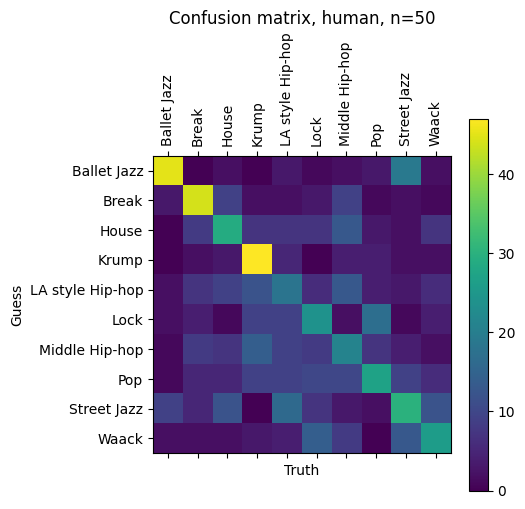

In [6]:

plt.matshow(mat.T)
plt.xticks(range(len(mat.columns)), mat.columns, rotation=90)
#make xticks on the bottom
plt.yticks(range(len(mat.index)), mat.index)
#plt.title('Confusion matrix, human, n=39')
plt.xlabel('Truth')
plt.ylabel('Guess')
plt.title('Confusion matrix, human, n=50')
plt.colorbar()
plt.savefig('../MovementClassifier/DanceProj1/plots/humanconfusion_n50.png', dpi=300)
plt.show()